In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\shahd\OneDrive - Northeastern University\Documents\MPS ANALYTICS\Winter Q3\ALY 6020\Projects\Week 5\bike_crash.csv")

In [3]:
df

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Highway System,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,No,No,False,15262,No,Incapacitating Injury,239,1,2010,Friday,Farm To Market,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
2,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
3,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
4,No,No,False,22775,No,Non-Incapacitating Injury,2300,1,2010,Monday,State Loop,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,None,Clear,Not Worn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,No,No,True,No Data,No,Non-Incapacitating Injury,1254,1,2017,Tuesday,No Data,Intersection Related,Daylight,City Street,Main/Proper Lane,40,Dry,Signal Light,Cloudy,Not Worn
2459,No,No,True,No Data,No,Non-Incapacitating Injury,2048,1,2017,Tuesday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,-1,Dry,Center Stripe/Divider,Clear,Not Worn
2460,No,No,True,No Data,No,Not Injured,737,0,2017,Thursday,No Data,Intersection Related,Daylight,City Street,Main/Proper Lane,30,Wet,Signal Light,Rain,Not Worn
2461,Yes,No,True,No Data,No,Non-Incapacitating Injury,930,1,2017,Friday,No Data,Intersection,Daylight,City Street,Main/Proper Lane,-1,Dry,Stop Sign,Clear,"Worn, Unk Damage"


## Data Cleaning

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   $1000 Damage to Any One Person's Property  2463 non-null   object
 1   Active School Zone Flag                    2463 non-null   object
 2   At Intersection Flag                       2463 non-null   bool  
 3   Average Daily Traffic Amount               2463 non-null   object
 4   Construction Zone Flag                     2463 non-null   object
 5   Crash Severity                             2463 non-null   object
 6   Crash Time                                 2463 non-null   int64 
 7   Crash Total Injury Count                   2463 non-null   int64 
 8   Crash Year                                 2463 non-null   int64 
 9   Day of Week                                2463 non-null   object
 10  Highway System                      

In [5]:
cols=df.columns
for i in range (len(cols)) :
    a = df[cols[i]].value_counts()
    print(cols[i], ": \n" ,a)
    print("/////////")

$1000 Damage to Any One Person's Property : 
 No     1735
Yes     728
Name: $1000 Damage to Any One Person's Property, dtype: int64
/////////
Active School Zone Flag : 
 No     2460
Yes       3
Name: Active School Zone Flag, dtype: int64
/////////
At Intersection Flag : 
 True     1294
False    1169
Name: At Intersection Flag, dtype: int64
/////////
Average Daily Traffic Amount : 
 No Data    2110
34215        31
33647        29
148494       24
44866        13
           ... 
39107         1
29344         1
174473        1
35009         1
141120        1
Name: Average Daily Traffic Amount, Length: 81, dtype: int64
/////////
Construction Zone Flag : 
 No     2433
Yes      30
Name: Construction Zone Flag, dtype: int64
/////////
Crash Severity : 
 Non-Incapacitating Injury    1474
Possible Injury               556
Incapacitating Injury         254
Not Injured                   163
Killed                         16
Name: Crash Severity, dtype: int64
/////////
Crash Time : 
 1830    22
1800

In [6]:
df['Average Daily Traffic Amount'] = df['Average Daily Traffic Amount'].replace('No Data',np.nan)
df['Highway System'] = df['Highway System'].replace('No Data',np.nan)
df['At Intersection Flag'] = df['At Intersection Flag'].replace({True: 'Yes', False: 'No'})
df['Surface Condition'] = df['Surface Condition'].replace({'Other (Explain In Narrative)': 'Unknown'})
df['Weather Condition'] = df['Weather Condition'].replace({'Other (Explain In Narrative)': 'Unknown'})
df = df[df['Speed Limit'] != -1]

In [7]:
df.isnull().sum()

$1000 Damage to Any One Person's Property       0
Active School Zone Flag                         0
At Intersection Flag                            0
Average Daily Traffic Amount                 1804
Construction Zone Flag                          0
Crash Severity                                  0
Crash Time                                      0
Crash Total Injury Count                        0
Crash Year                                      0
Day of Week                                     0
Highway System                               1775
Intersection Related                            0
Light Condition                                 0
Road Class                                      0
Roadway Part                                    0
Speed Limit                                     0
Surface Condition                               0
Traffic Control Type                            0
Weather Condition                               0
Person Helmet                                   0


In [8]:
df = df.drop(['Average Daily Traffic Amount','Highway System'], axis= 1)

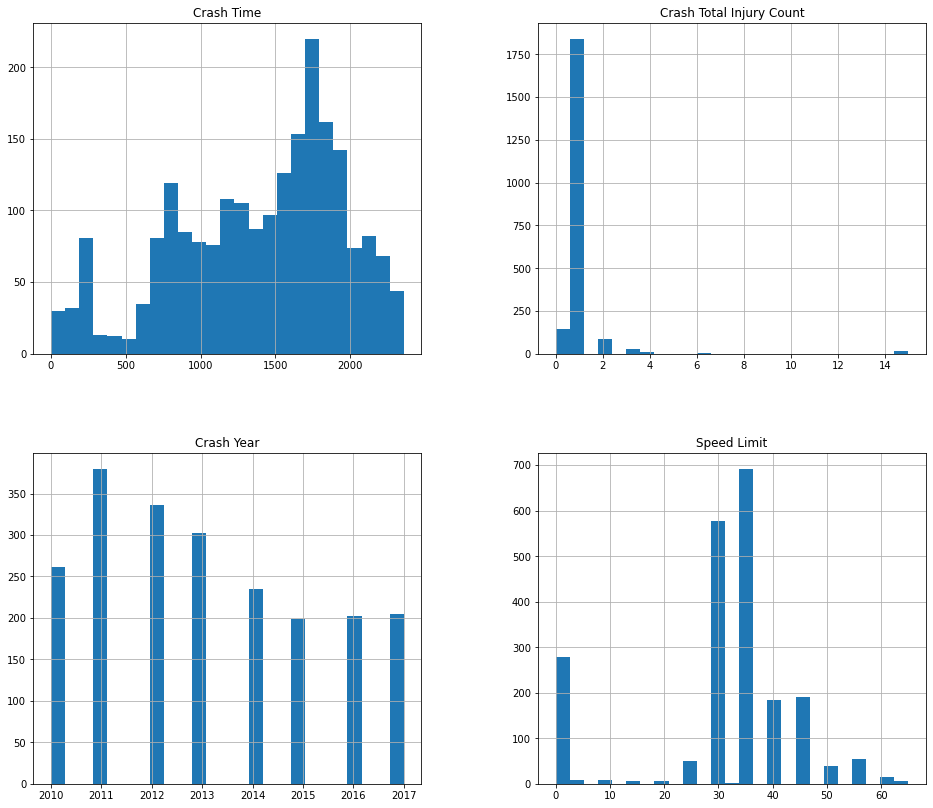

In [9]:
df.hist(figsize=(16,14),bins=25);

In [10]:
cat_cols=["$1000 Damage to Any One Person's Property", 'Active School Zone Flag',
       'At Intersection Flag', 'Construction Zone Flag','Day of Week',
       'Intersection Related', 'Light Condition', 'Road Class', 'Roadway Part', 
       'Surface Condition', 'Traffic Control Type',
       'Weather Condition', 'Person Helmet']
for i in range (len(cat_cols)) :
    a = df[cat_cols[i]].unique()
    d = {a[j]: j for j in range(len(a))}
    col_name = "%s_new"%(cat_cols[i])
    df[col_name]=df[cat_cols[i]].map(d)
    print(cat_cols[i], ": \n" ,d)

$1000 Damage to Any One Person's Property : 
 {'No': 0, 'Yes': 1}
Active School Zone Flag : 
 {'No': 0, 'Yes': 1}
At Intersection Flag : 
 {'No': 0, 'Yes': 1}
Construction Zone Flag : 
 {'No': 0, 'Yes': 1}
Day of Week : 
 {'Friday': 0, 'Monday': 1, 'Wednesday': 2, 'Thursday': 3, 'Tuesday': 4, 'Saturday': 5, 'Sunday': 6}
Intersection Related : 
 {'Non Intersection': 0, 'Intersection Related': 1, 'Driveway Access': 2, 'Intersection': 3, 'Not Reported': 4}
Light Condition : 
 {'Dark, Lighted': 0, 'Dark, Not Lighted': 1, 'Daylight': 2, 'Dusk': 3, 'Unknown': 4, 'Dark, Unknown Lighting': 5, 'Dawn': 6}
Road Class : 
 {'Farm To Market': 0, 'City Street': 1, 'US & State Highways': 2, 'Interstate': 3, 'Non Trafficway': 4, 'County Road': 5, 'Other Roads': 6}
Roadway Part : 
 {'Main/Proper Lane': 0, 'Service/Frontage Road': 1, 'Other (Explain In Narrative)': 2, 'Entrance/On Ramp': 3}
Surface Condition : 
 {'Dry': 0, 'Wet': 1, 'Unknown': 2, 'Ice': 3, 'Sand, Mud, Dirt': 4, 'Standing Water': 5}
Traff

In [11]:
#( Possibly Injury, Incapacitating Injury, Killed vs. a non severe incident)
df['Crash Severity_new'] = df['Crash Severity'].replace({'Incapacitating Injury': 1, 'Non-Incapacitating Injury': 0,
                                                         'Possible Injury': 1, 'Not Injured': 0, 'Killed': 1})

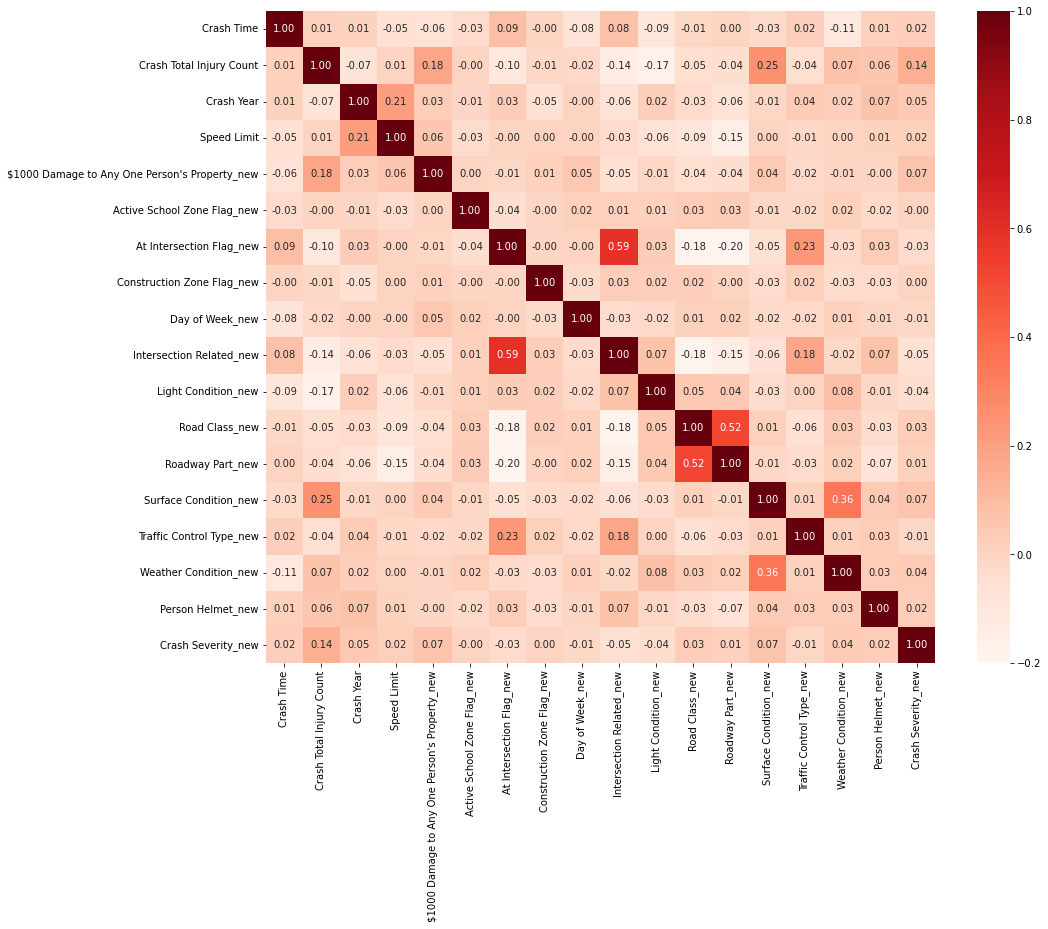

In [12]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True,fmt=".2f");

## Modelling

### Logistic Regression

Column Names:
[['Crash Time', 'Crash Total Injury Count', 'Crash Year', 
       'Speed Limit', "$1000 Damage to Any One Person's Property_new",
       'Active School Zone Flag_new', 'At Intersection Flag_new',
       'Construction Zone Flag_new', 'Day of Week_new',
       'Intersection Related_new', 'Light Condition_new', 'Road Class_new',
       'Roadway Part_new', 'Surface Condition_new', 'Traffic Control Type_new',
       'Weather Condition_new', 'Person Helmet_new']]

In [13]:
X=df[['Crash Total Injury Count',"$1000 Damage to Any One Person's Property_new",'Surface Condition_new','Crash Year','Intersection Related_new','Light Condition_new']]
y=df[['Crash Severity_new']]
X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(X,y, test_size=0.20,random_state=56)
print(X_trainLR.shape)
print(X_testLR.shape) 

(1696, 6)
(424, 6)


In [14]:
sc = StandardScaler()
x_train = sc.fit_transform(X_trainLR.values)
X_trainLR = pd.DataFrame(x_train,index = X_trainLR.index, columns = X_trainLR.columns)
x_test = sc.fit_transform(X_testLR.values)
X_testLR = pd.DataFrame(x_test,index = X_testLR.index, columns = X_testLR.columns)

In [15]:
m1= sm.Logit(y_trainLR, X_trainLR.astype(float)) 
LRM1 = m1.fit()
print(LRM1.summary())

Optimization terminated successfully.
         Current function value: 0.677564
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Crash Severity_new   No. Observations:                 1696
Model:                          Logit   Df Residuals:                     1690
Method:                           MLE   Df Model:                            5
Date:                Sun, 12 Feb 2023   Pseudo R-squ.:                -0.06404
Time:                        19:10:39   Log-Likelihood:                -1149.1
converged:                       True   LL-Null:                       -1080.0
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Crash Total Injury Count              

In [16]:
y_pred1=LRM1.predict(X_testLR).round()
print(confusion_matrix(y_testLR, y_pred1))
print(classification_report(y_testLR, y_pred1))

[[214  64]
 [ 94  52]]
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       278
           1       0.45      0.36      0.40       146

    accuracy                           0.63       424
   macro avg       0.57      0.56      0.56       424
weighted avg       0.61      0.63      0.62       424



In [17]:
X=df[['Crash Total Injury Count','Crash Year']]
y=df[['Crash Severity_new']]
X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(X,y, test_size=0.20,random_state=56)

In [18]:
m2= sm.Logit(y_trainLR, X_trainLR.astype(float)) 
LRM2 = m2.fit()
print(LRM2.summary())

Optimization terminated successfully.
         Current function value: 0.627296
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Crash Severity_new   No. Observations:                 1696
Model:                          Logit   Df Residuals:                     1694
Method:                           MLE   Df Model:                            1
Date:                Sun, 12 Feb 2023   Pseudo R-squ.:                 0.01490
Time:                        19:10:39   Log-Likelihood:                -1063.9
converged:                       True   LL-Null:                       -1080.0
Covariance Type:            nonrobust   LLR p-value:                 1.398e-08
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Crash Total Injury Count     0.3739      0.099      3.763      0.000       0.179

In [19]:
y_pred2=LRM2.predict(X_testLR).round()
print(confusion_matrix(y_testLR, y_pred2))
print(classification_report(y_testLR, y_pred2))

[[276   2]
 [137   9]]
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       278
           1       0.82      0.06      0.11       146

    accuracy                           0.67       424
   macro avg       0.74      0.53      0.46       424
weighted avg       0.72      0.67      0.56       424



### Random Forest

In [20]:
X=df[['Crash Total Injury Count',"$1000 Damage to Any One Person's Property_new",'Surface Condition_new','Crash Year','Intersection Related_new','Light Condition_new']]
y=df[['Crash Severity_new']]
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(X,y, test_size=0.20,random_state=56)

In [21]:
sc = StandardScaler()
x_train = sc.fit_transform(X_trainRF.values)
X_trainRF = pd.DataFrame(x_train,index = X_trainRF.index, columns = X_trainRF.columns)
x_test = sc.fit_transform(X_testRF.values)
X_testRF = pd.DataFrame(x_test,index = X_testRF.index, columns = X_testRF.columns)

In [22]:
RFM = RandomForestClassifier(random_state=56,n_estimators=5000)   
RFM.fit(X_trainRF,y_trainRF)

RandomForestClassifier(n_estimators=5000, random_state=56)

In [23]:
y_predRD = RFM.predict(X_testRF)
print(confusion_matrix(y_testRF, y_predRD))
print(classification_report(y_testRF, y_predRD))

[[232  46]
 [110  36]]
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       278
           1       0.44      0.25      0.32       146

    accuracy                           0.63       424
   macro avg       0.56      0.54      0.53       424
weighted avg       0.60      0.63      0.60       424



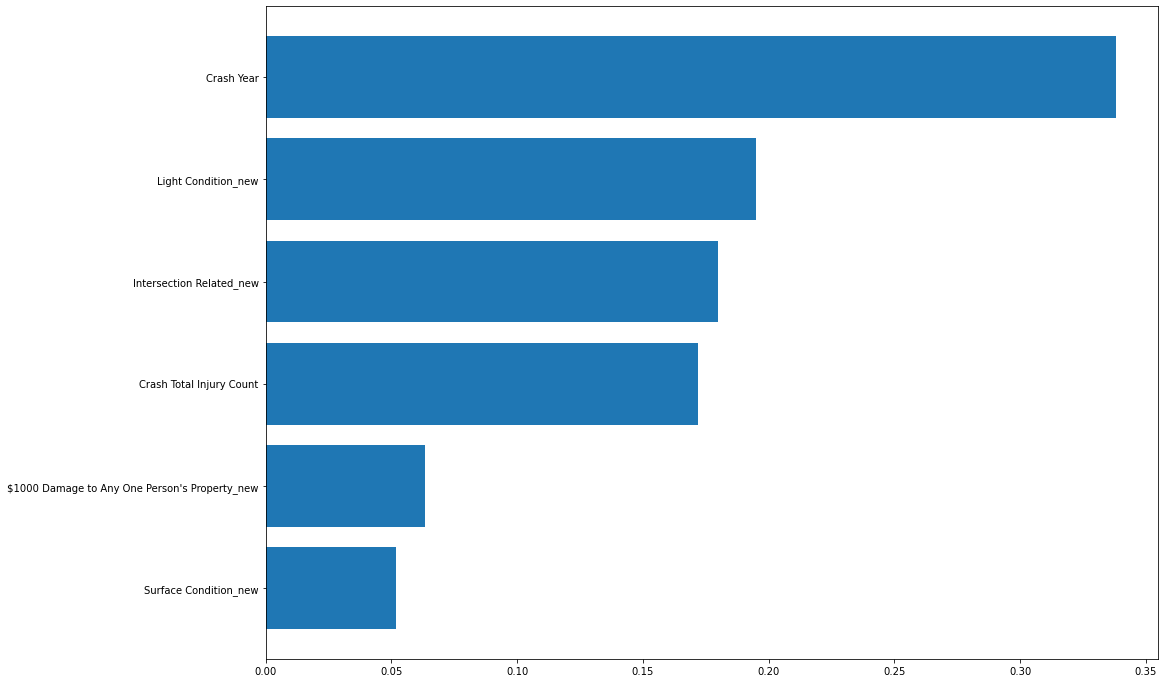

In [24]:
importances = RFM.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize =(16,12))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_trainRF.columns)[indices])

### Neural Network Classification

In [25]:
X=df[['Crash Total Injury Count',"$1000 Damage to Any One Person's Property_new",'Surface Condition_new','Crash Year','Intersection Related_new','Light Condition_new']]
y=df[['Crash Severity_new']]
X_trainNN, X_testNN, y_trainNN, y_testNN = train_test_split(X,y, test_size=0.20,random_state=56)

In [26]:
sc = StandardScaler()
x_train = sc.fit_transform(X_trainNN.values)
X_trainNN = pd.DataFrame(x_train,index = X_trainNN.index, columns = X_trainNN.columns)
x_test = sc.fit_transform(X_testRF.values)
X_testNN = pd.DataFrame(x_test,index = X_testNN.index, columns = X_testNN.columns)

In [27]:
from sklearn.neural_network import MLPClassifier
MPLC = MLPClassifier(10, activation = 'relu', solver = 'sgd',learning_rate_init = 0.01, max_iter = 15000 )
MPLC.fit(X_trainNN,y_trainNN)
y_predNN = MPLC.predict(X_testNN)
print(confusion_matrix(y_testNN, y_predNN))
print(classification_report(y_testNN, y_predNN))

[[277   1]
 [137   9]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       278
           1       0.90      0.06      0.12       146

    accuracy                           0.67       424
   macro avg       0.78      0.53      0.46       424
weighted avg       0.75      0.67      0.56       424



In [28]:
from sklearn.neural_network import MLPClassifier
MPLC = MLPClassifier(10, activation = 'relu', solver = 'sgd',learning_rate_init = 0.01, max_iter = 20000 )
MPLC.fit(X_trainNN,y_trainNN)
y_predNN = MPLC.predict(X_testNN)
print(confusion_matrix(y_testNN, y_predNN))
print(classification_report(y_testNN, y_predNN))

[[273   5]
 [136  10]]
              precision    recall  f1-score   support

           0       0.67      0.98      0.79       278
           1       0.67      0.07      0.12       146

    accuracy                           0.67       424
   macro avg       0.67      0.53      0.46       424
weighted avg       0.67      0.67      0.56       424



In [29]:
from sklearn.neural_network import MLPClassifier
MPLC = MLPClassifier(10, activation = 'relu', solver = 'sgd',learning_rate_init = 0.01, max_iter = 25000 )
MPLC.fit(X_trainNN,y_trainNN)
y_predNN = MPLC.predict(X_testNN)
print(confusion_matrix(y_testNN, y_predNN))
print(classification_report(y_testNN, y_predNN))

[[274   4]
 [131  15]]
              precision    recall  f1-score   support

           0       0.68      0.99      0.80       278
           1       0.79      0.10      0.18       146

    accuracy                           0.68       424
   macro avg       0.73      0.54      0.49       424
weighted avg       0.72      0.68      0.59       424

